In [1]:
# from typing_extensions import dataclass_transform
# # Client: Problem? objective(BA)
# # BA: data
# # Connect: DA, DS: data
# Scrum:Scrum master(PM)
# cloud, mail, servers, JIRA-tool

# Object: data
# Report: EDA: data Analyst(ADHOC)
# DS: (Data: )EDA(DS: EDA: DA: Data; Char)
# Regression, Class

In [2]:
# X = TV, Newspaper, Radio, 30
# y = sales

# feature Engineering

  # Missing Fill
  # Textual data to Numerical value( textual to num): Dummy,
  # Outliers: remove
  # Unwanted Features Remove(domain)
  # feature scaling: Machine learning : calculation Distance based

# Preprocessing
# x, y

# 1200 - 200
# 23456789 - 3456789
# 12-2

In [3]:
# Canada Per Capita Income capita predict

In [4]:
# Load Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
print('Done')

Done


In [5]:
# Step 2: Load Data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mfaisalqureshi/canada-per-capita-income")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\mfaisalqureshi\canada-per-capita-income\versions\1


In [6]:
#Step 3:  File Read
file_path = path + '/' + os.listdir(path)[0]

#Step 4:  Read data
df = pd.read_csv(file_path)
print('Done')

Done


In [7]:
#Step 5:  EDA: Part
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [8]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [9]:
df.shape

(47, 2)

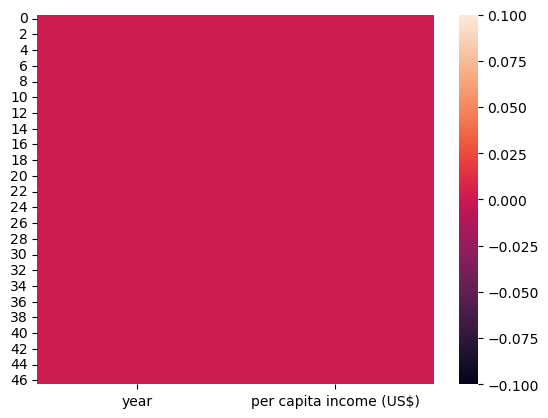

In [10]:
sns.heatmap(df.isna())
plt.show()

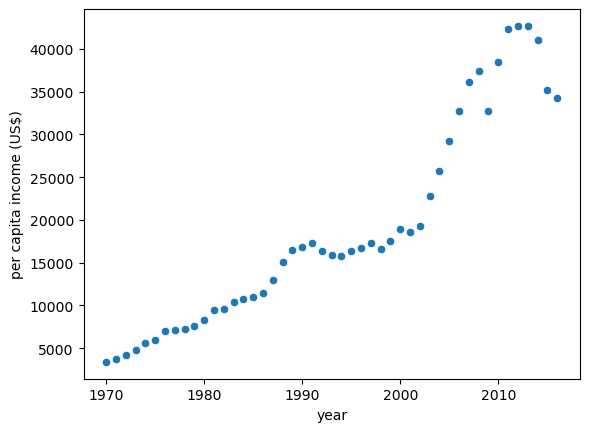

In [11]:
# sns.lineplot(data = df, x = 'year', y = 'per capita income (US$)')
sns.scatterplot(data = df, x = 'year', y = 'per capita income (US$)')
plt.show()

In [12]:
df.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [13]:
df.sample()

,year,per capita income (US$)
3,1973,4804.463248


In [14]:
df.shape

(47, 2)

In [15]:
# 47: : 40: training:
# 7: testing

# Split: Big rows: Avoid()



In [16]:
# X, y
# X: Feature
# y: Target

In [17]:
df.sample()

,year,per capita income (US$)
35,2005,29198.05569


In [18]:
X = df[['year']]   # 2d: df
y = df['per capita income (US$)']  # Series:

print('Done')

Done


In [19]:
model = LinearRegression()

#training Step
model.fit(X,y)  # Hyper Parameters: Model Fine Tune
# Hyper Tune:
# (data: predict: next future data: false: wrong Prediction)


LinearRegression()

In [20]:
X.max()

year    2016
dtype: int64

In [21]:
year = [[2018]]

capita = round(model.predict(year)[0],2)

print(f'''per Capita $
{year[0][0]}: {capita}''')

per Capita $
2018: 39631.76


In [22]:
y_pred = model.predict(X)
print('Done')

Done


In [23]:
df.sample()

,year,per capita income (US$)
15,1985,11018.95585


In [24]:
df['Predicted Capita'] = y_pred

In [25]:
df.head(10)

,year,per capita income (US$),Predicted Capita
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634
5,1975,5998.144346,4007.765709
6,1976,7062.131392,4836.230785
7,1977,7100.126170,5664.695860
8,1978,7247.967035,6493.160935
9,1979,7602.912681,7321.626010


In [26]:
mae = ((df['per capita income (US$)'] - df['Predicted Capita']).abs()).mean()

In [27]:
# MAE
from sklearn.metrics import mean_absolute_error

In [28]:
#Step:  Evalute()

# mean_absolute_error(y_actual, y_pred)
# y_actual = y
# y_pred = y_pred


MAE = mean_absolute_error(y, y_pred)

In [29]:
print('Mannual mae:',mae)
print('Actual mae:',MAE)

Mannual mae: 3088.866427771443
Actual mae: 3088.866427771443


In [30]:
mse = ((df['per capita income (US$)'] - df['Predicted Capita'])**2).mean()
mse

np.float64(15462739.061504772)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:


MSE = mean_squared_error(y,y_pred)
print(MSE)

15462739.061504772


In [33]:
print('Mannual mse:',mse)
print('Actual MSE:',MSE)

Mannual mse: 15462739.061504772
Actual MSE: 15462739.061504772


In [34]:
from sklearn.metrics import root_mean_squared_error

In [35]:
rmse = mse**.5
RMSE = root_mean_squared_error(y,y_pred)

In [36]:
print('Mannual mse:',rmse)
print('Actual MSE:',RMSE)

Mannual mse: 3932.268945723928
Actual MSE: 3932.268945723928


In [37]:
# model score

In [38]:
model_score = model.score(X,y)
print('Model Score is: ',model_score)

Model Score is:  0.890916917957032


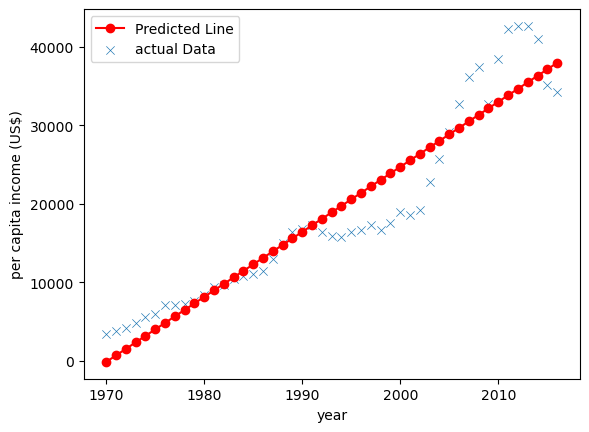

In [39]:
plt.plot(X,y_pred, color = 'red',label = 'Predicted Line',marker = 'o')
sns.scatterplot(data = df, x = 'year', y = 'per capita income (US$)',marker = 'x',label = 'actual Data')
plt.legend()
plt.show()

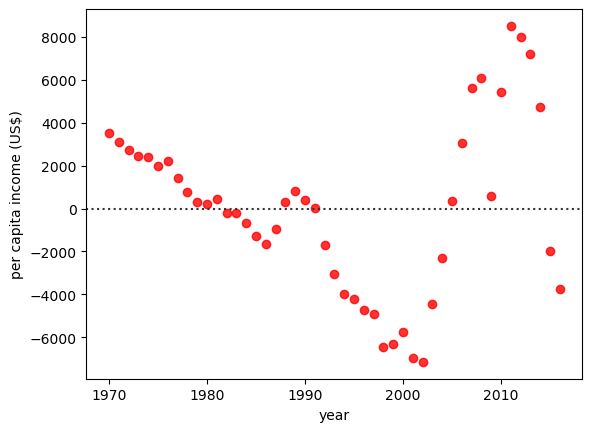

In [40]:
sns.residplot(data = df, x = X, y = y,color = 'r')
plt.show()

In [41]:
# Last Step: Save

In [42]:
# model brain : ready

In [43]:
import pickle
# Save: File
# load, dump: (model)


with open('capita_pred.pkl','wb') as f:
  pickle.dump(model,f)

print('Done')

Done


In [44]:
import pickle
import warnings
warnings.filterwarnings('ignore')
with open('capita_pred.pkl','rb') as f:
    chatgpt = pickle.load(f)
print('Done')

Done


In [45]:
year = float(input('Enter year to predict capita: '))

final_year = [[year]]

capita = round(chatgpt.predict(final_year)[0],2)

print(f'''
Year: {int(year)}
Capita in USD($): {capita}''')

Enter year to predict capita:  2006



Year: 2006
Capita in USD($): 29690.18


Property Price Prediction Project

# Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

STEP 1 IMPORT LIBRARIES

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.datasets import fetch_california_housing

warnings.filterwarnings('ignore')
print('Modules Loaded Successfully!!')

Modules Loaded Successfully!!


STEP 2: LOAD DATA CREATE DF

In [47]:
# Internet Required For This Code to Run
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [48]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [49]:
print(data_dict['target_names'])

['MedHouseVal']


In [50]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print('Data Loaded Successfully!!')

Data Loaded Successfully!!


STEP 3 UNDERSTANING DATA USING EDA

In [51]:
# Shape
df.shape

(20640, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [53]:
# Checking Null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [54]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [55]:
# hundreds of thousands of dollars ($100,000) 1 lakh Dollars
# average number of household members
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11001,9.3845,26.0,7.922252,1.010724,1074.0,2.879357,33.75,-117.79,5.00001


In [56]:
# All data Must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

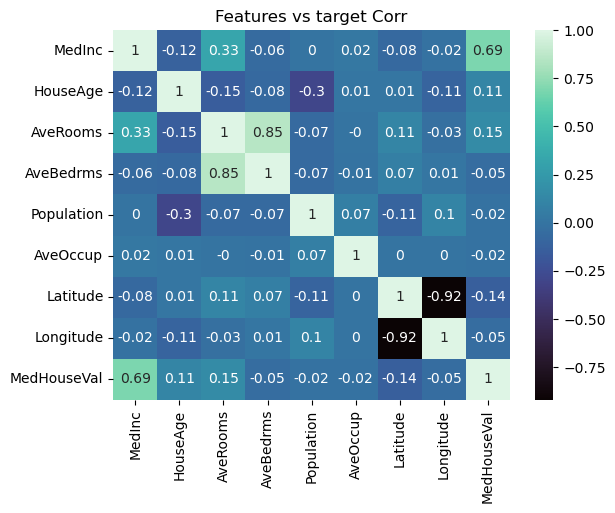

In [57]:
# Checking data Distribution

plt.title('Features vs target Corr')
sns.heatmap(df.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map ( -1 to 1)
plt.show()

In [58]:
# Data Describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


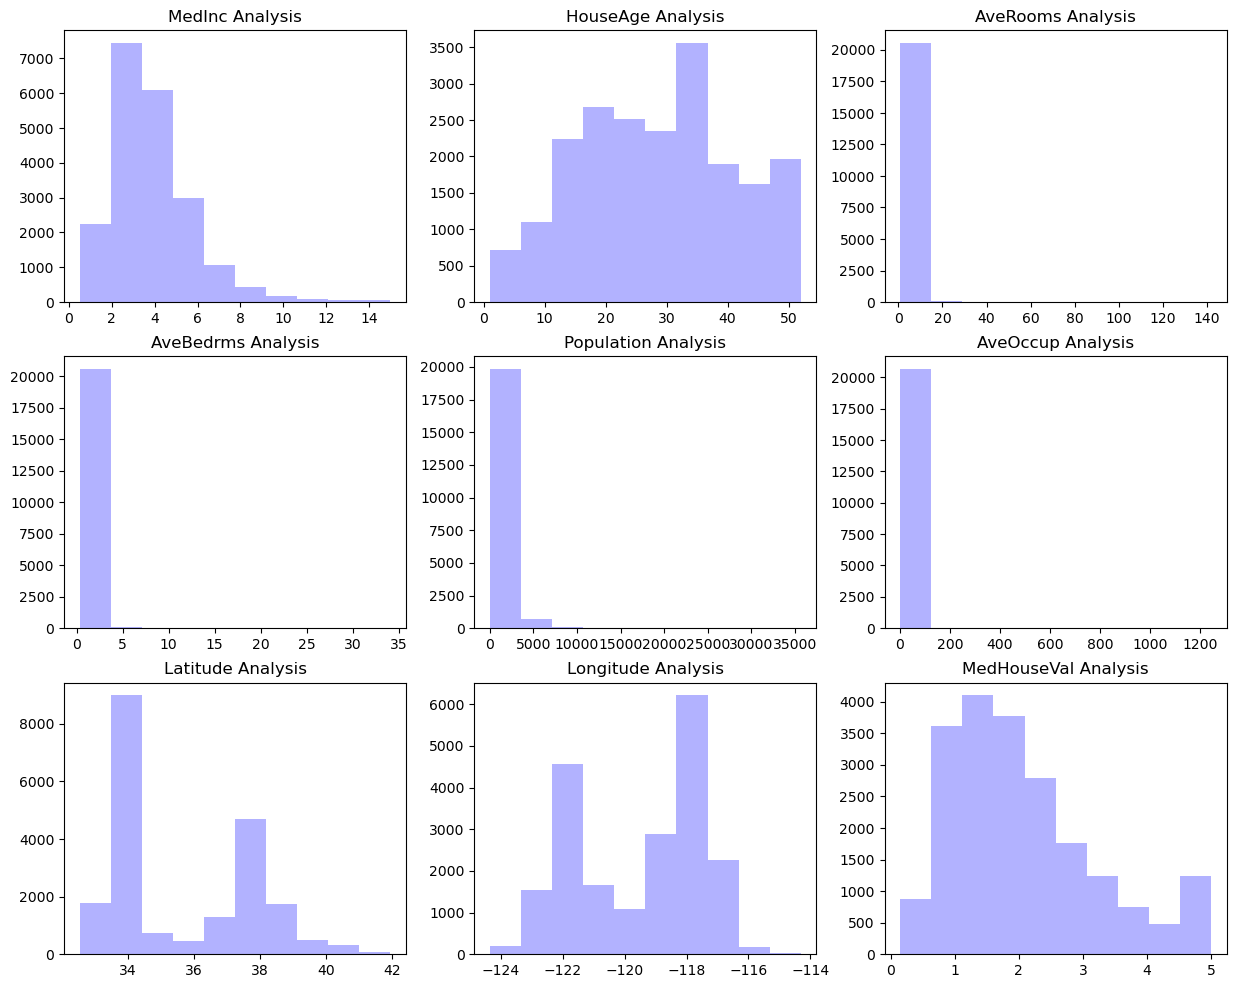

In [59]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

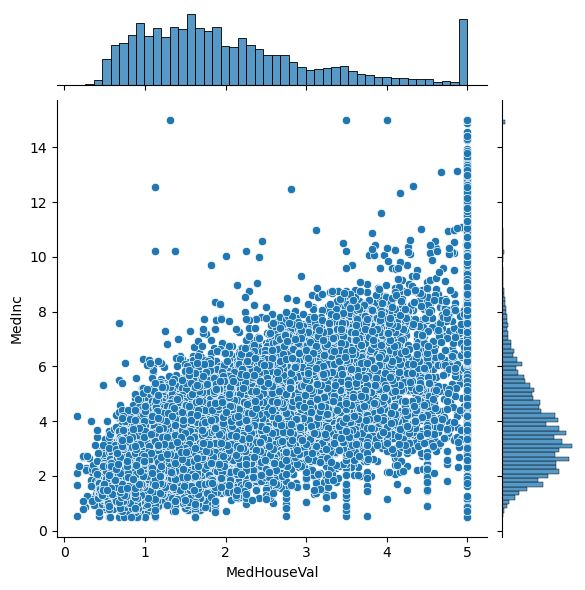

In [60]:
# Distribution of target Value MedHousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

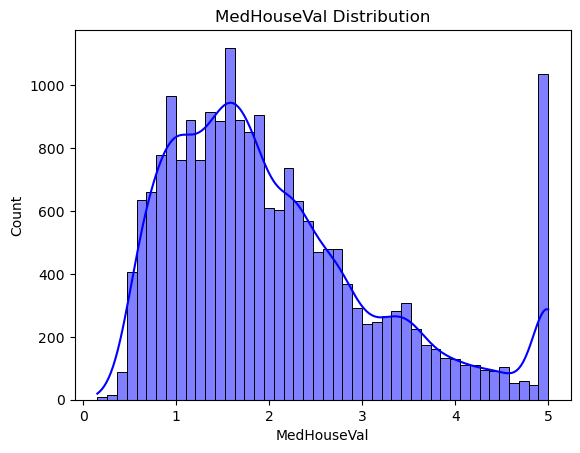

In [61]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [62]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Step 4: Feature Engineering and Preprocessing

In [63]:
# Convert data to Same Scale for better prediction
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')

Done


In [64]:
X_scaled.min()
X_scaled.max()

np.float64(1.0000000000000002)

DAY 17

STEP 5 : TRAIN TEST SPLIT : SPLIT DATA FOR TRAINING AND TESTING 

In [65]:
from sklearn.model_selection import train_test_split
# train_test_split : divides

X_train, X_test, Y_train , Y_test =train_test_split(X_scaled,y, random_state = 120)
print('done')

done


In [66]:
print('shade of X_train ', X_train.shape)
print('shade of X_train ', X_test.shape)
print('shade of X_train ', Y_train.shape)
print('shade of X_train ', Y_test.shape)

shade of X_train  (15480, 8)
shade of X_train  (5160, 8)
shade of X_train  (15480,)
shade of X_train  (5160,)


In [67]:
X_scaled.shape

(20640, 8)

In [68]:
df.shape

(20640, 9)

STEP 6: MODEL BUILDING 

STEP 6.1 : LINEAR MODEL USING LINEAR REGRESSION

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr_model = LinearRegression()

lr_model.fit(X_train,Y_train)

LinearRegression()

In [71]:
y_pred = lr_model.predict(X_test)
print('done')

done


In [72]:
# 20% actual answer : y_test, predicted = y_pred

lr_compare_df = pd.DataFrame({'actual house price': Y_test,
            'Predicted house price': y_pred})

print('done')

done


In [73]:
lr_compare_df 

,actual house price,Predicted house price
669,1.92600,2.081638
12255,1.20700,0.985714
9036,1.20000,1.416779
10139,1.59500,1.866114
5824,3.20400,2.187530
...,...,...
7746,2.20500,2.044372
2035,0.50000,1.034562
11627,3.98800,3.865648
9930,2.69900,2.365442


In [74]:
lr_mae = mean_absolute_error(Y_test,y_pred)
print('MAE', lr_mae)

MAE 0.5405799152639073


In [75]:
lr_mse = mean_squared_error(Y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.56005611447194


In [76]:
lr_rmse = lr_mse**.5
print('Lr RMSE',lr_rmse)

Lr RMSE 0.7483689694742427


In [77]:
# training score
lr_train_score = lr_model.score(X_train,Y_train)
print('Training score', lr_train_score)

# testing score
lr_test_score = lr_model.score(X_test,Y_test)
print('testing score', lr_test_score)

Training score 0.6126185577508554
testing score 0.5803496836512723


In [78]:
# VIF  varaiance inflation center

# high training score, low testing score : overfitting
# low training score, high testing score : underfitting
# balanced training score, balanced testing score : balanced fitting
# model overfit : biasness increase
# model underfit : variance increase

# PCA : principal component analysis: dimensionality, feature(kaam ke columns) ko hata deta hai

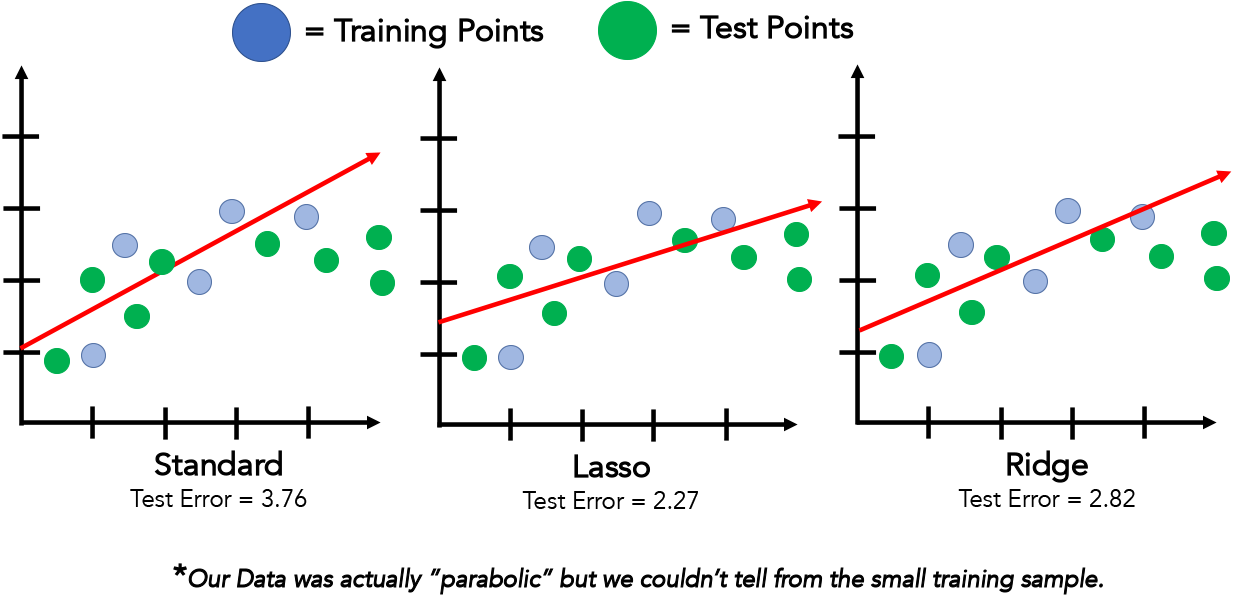

step 6.1.3 chacking vif and drop column if value vif>10

In [79]:
X_train_df=pd.DataFrame(X_train,columns=data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14002,0.074358,0.607843,0.022404,0.023468,0.036128,0.002863,0.155154,0.60757


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
1981,0.199563,0.27451,0.033223,0.022873,0.080748,0.002605,0.162593,0.670319,1


In [82]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,Intercept,180.817512
6,Latitude,9.358644
7,Longitude,9.021597
2,AveRooms,8.484122
3,AveBedrms,7.083066
0,MedInc,2.660809
1,HouseAge,1.239562
4,Population,1.133978
5,AveOccup,1.007967


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_df['intercept']=1
X_train_df.sample()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
13218,0.315403,0.156863,0.035971,0.01723,0.042714,0.001829,0.034006,0.744024,1


In [84]:
vif_df.columns

Index(['Features', 'VIF factor'], dtype='object')

In [85]:
vif_df=pd.DataFrame()
vif_df['features']=data_dict['feature_names']+['intercept']
vif_value=[variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]
vif_df['vif factor']=vif_value
vif_df.sort_values(by='vif factor',ascending=False)

,features,vif factor
8,intercept,180.817512
6,Latitude,9.358644
7,Longitude,9.021597
2,AveRooms,8.484122
3,AveBedrms,7.083066
0,MedInc,2.660809
1,HouseAge,1.239562
4,Population,1.133978
5,AveOccup,1.007967


In [86]:
vif_df.columns

Index(['features', 'vif factor'], dtype='object')

In [87]:
#x is an independent feature
print(['hello'+str(i) for i in range(10)])
#

['hello0', 'hello1', 'hello2', 'hello3', 'hello4', 'hello5', 'hello6', 'hello7', 'hello8', 'hello9']


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']=1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
13615,0.184218,0.745098,0.034296,0.029388,0.016032,0.001446,0.581296,0.223108,1


In [89]:
vif_df = pd.DataFrame()
vif_df['features'] = list(data_dict['feature_names']) + ['Intercept']
vif_value = variance_inflation_factor

In [90]:
X_train_df_vif = X_train_df.drop('intercept',axis=1)

In [91]:
col= list(X.columns)
col.remove('Latitude')

X_train_vif = X_train_df[col]
X_train_vif.sample()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
9067,0.352078,0.27451,0.028137,0.020615,0.05258,0.000995,0.62251


In [102]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [103]:
ml_model = LinearRegression

built_model(ml_model,col)

NameError: name 'y_train' is not defined

In [94]:
from sklearn.linear_model import Lasso, Ridge

In [95]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000335,0.912294,1.335025,1.155433,-0.000335


In [96]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000335,0.912294,1.335025,1.155433,-0.000335


In [98]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [99]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [100]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, Y_train, Y_test = train_test_split(ss_X, y,random_state=i,test_size=0.2)
  i += 1

  temp_df = built_model(LinearRegression,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)
    break

  display(clear=True)

KeyboardInterrupt: 

In [101]:
final_model

NameError: name 'final_model' is not defined

STEP 7 MODEL SAVE AND LOCALHOST DEPLOYMENT

In [ ]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller Saved Successfully!!')